In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv("vehicle-1.csv")
df

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    66.0                       10          207.0   
3                    63.0                        9          144.0   
4                   103.0                       52          149.0   
..                    ...                      ...            ...   
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             32.0                    23.0                        158   
3             46.0                    19.0                        143   
4             45.0                    19.0                        144   
..             ...                     ...                        ...   
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
4              241.0              325.0                      188.0   
..               ...                ...                        ...   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   

# 1) Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm

In [67]:
df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [4]:
df.describe(include = np.object).transpose()  

count unique  top freq
class   846      3  car  429

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [6]:
df.isnull().sum()


compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [68]:
num_cols = list(df.describe().columns)

In [69]:
for i in num_cols:
    df[i].fillna(value = df[i].median(), inplace = True)
    

In [70]:
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [71]:
a = df.duplicated()

print("no of duplicate rows:", a.sum())

no of duplicate rows: 0


# 2) Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (10 points)

In [11]:
df.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.689743     0.620912              0.767035   
pr.axis_aspect_ratio            0.091534     0.153778              0.158456   
max.length_aspect_ratio         0.148249     0.251467              0.264686   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.762070     0.796306              0.861519   
scaled_variance.1               0.814012     0.835946              0.886017   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.249593     0.051946             -0.225944   
skewness_about                  0.236078     0.144198              0.113924   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689743              0.091534   
circularity                      0.620912              0.153778   
distance_circularity             0.767035              0.158456   
radius_ratio                     1.000000              0.663447   
pr.axis_aspect_ratio             0.663447              1.000000   
max.length_aspect_ratio          0.450052              0.648724   
scatter_ratio                    0.734429              0.103732   
elongatedness                   -0.789481             -0.183035   
pr.axis_rectangularity           0.708385              0.079604   
max.length_rectangularity        0.568949              0.126909   
scaled_variance                  0.793415              0.272910   
scaled_variance.1                0.718436              0.089189   
scaled_radius_of_gyration        0.536372              0.121971   
scaled_radius_of_gyration.1     -0.180397              0.152950   
skewness_about                   0.048713             -0.058371   
skewness_about.1                 0.173741             -0.031976   
skewness_about.2                 0.382214              0.239886   
hollows_ratio                    0.471309              0.267725   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812620   
circularity                                 0.251467       0.847938   
distance_circularity                        0.264686       0.905076   
radius_ratio                                0.450052       0.734429   
pr.axis_aspect_ratio                        0.648724       0.103732   
max.length_aspect_ratio                     1.000000       0.166191   
scatter_ratio                               0.166191       1.000000   
elongatedness                              -0.180140      -0.971601   
pr.axis_rectangularity                      0.161502       0.989751   
max.length_rectangularity                   0.305943       0.809083   
scaled_variance                             0.318957       0.948662   
scaled_variance.1                           0.143253       0.993012   
scaled_radius_of_gyration                   0.189743       0.799875   
scaled_radius_of_gyration.1                 0.295735      -0.027542   
skewness_about                              0.015599       0.074458   
skewness_about.1                            0.043422       0.212428   
skewness_about.2                           -0.

In [12]:
df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

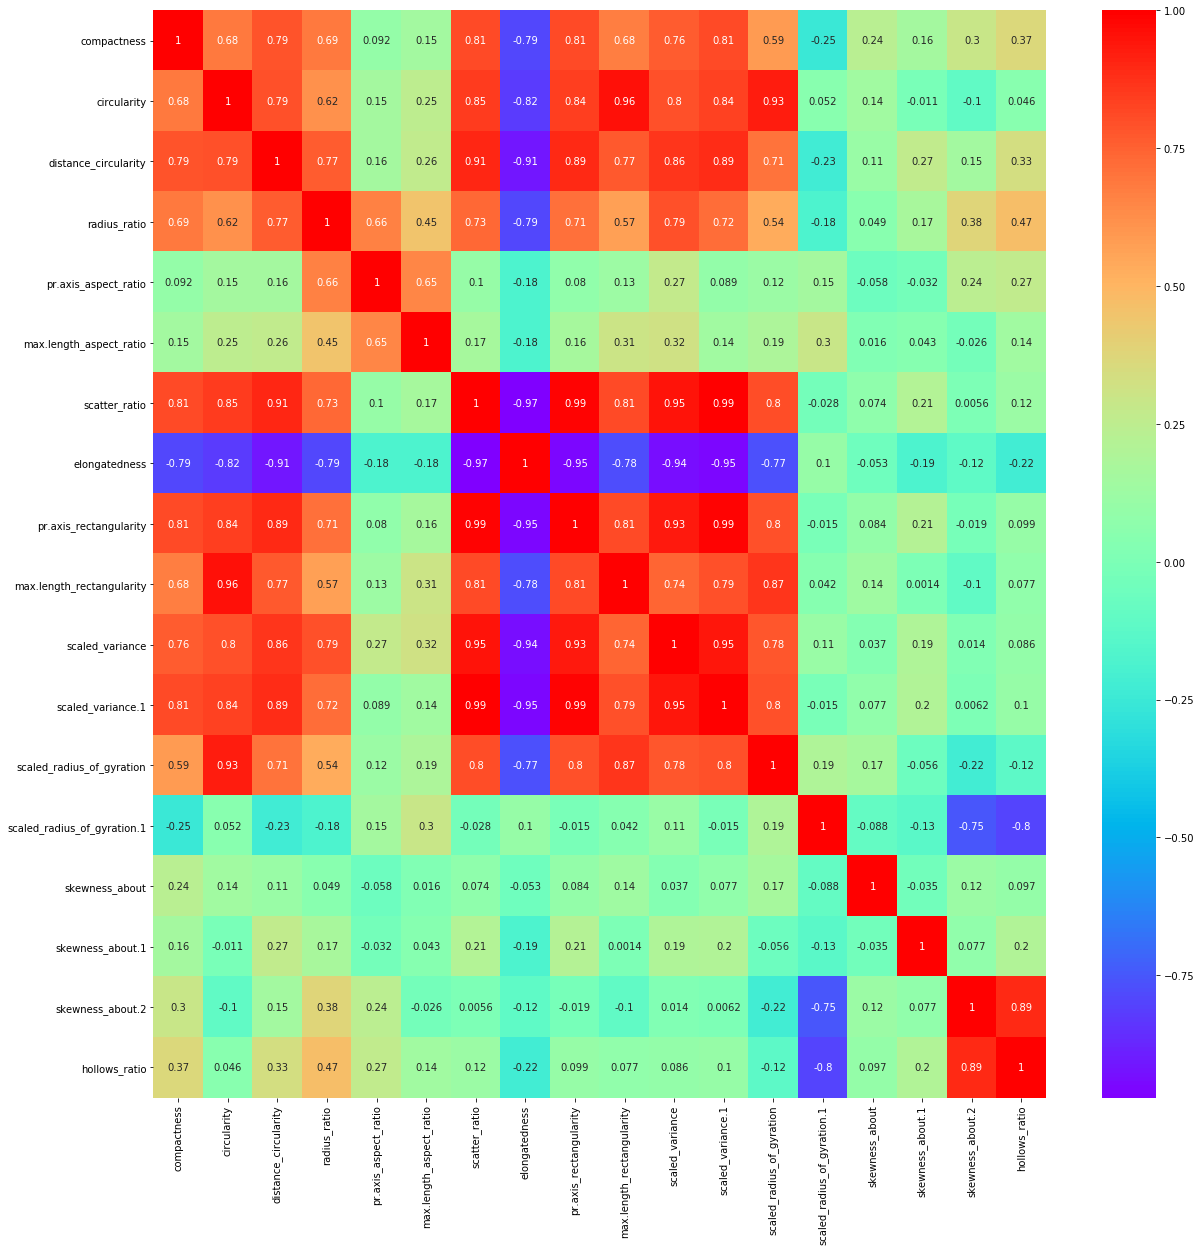

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, cmap = "rainbow" )
plt.savefig("Heatmap/heatmap.jpg", dpi = 100, bbox_tight = True)

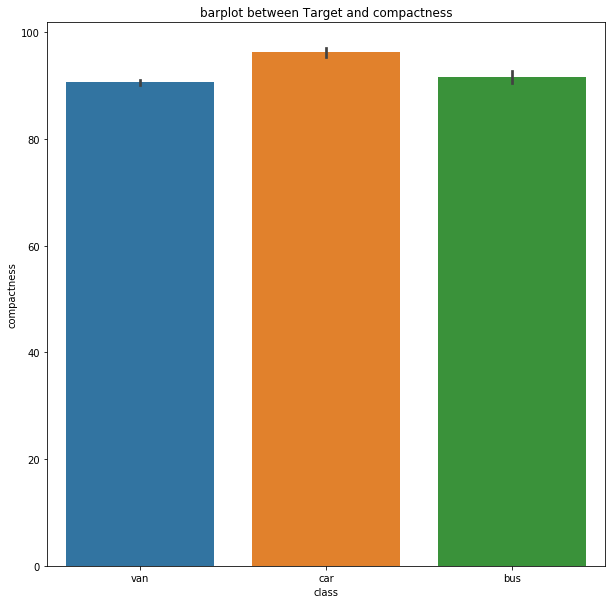

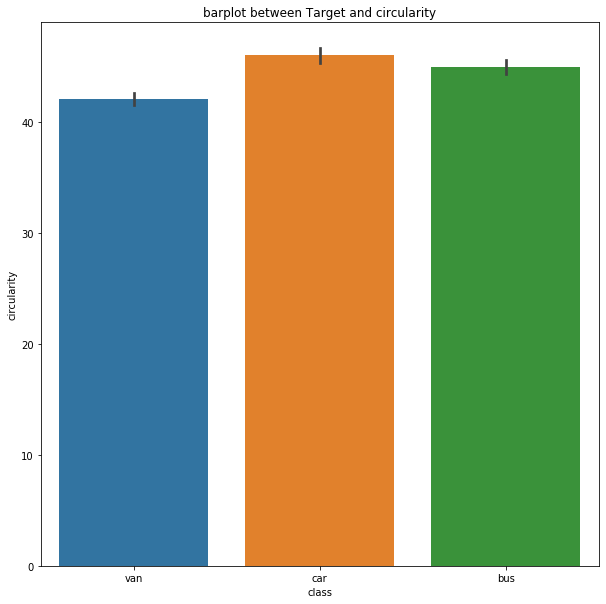

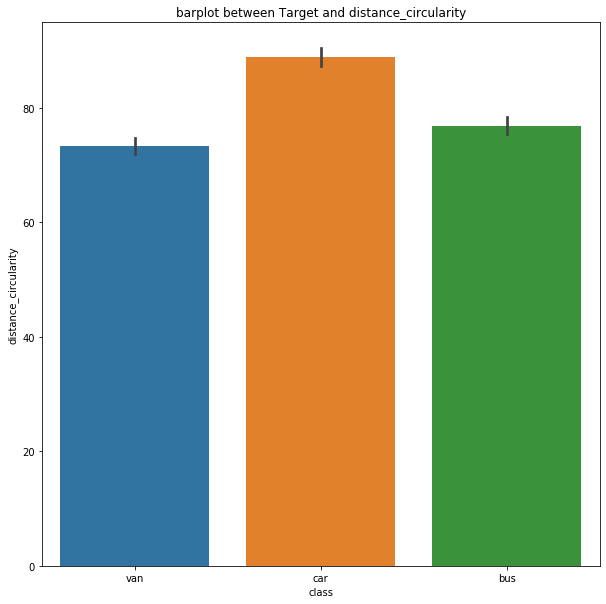

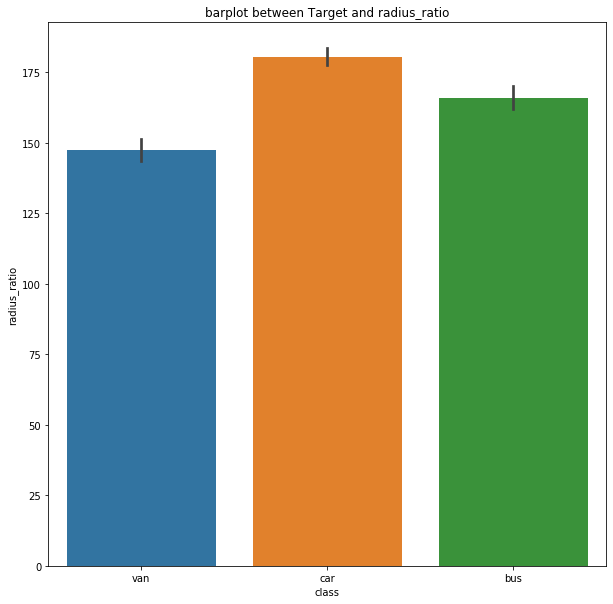

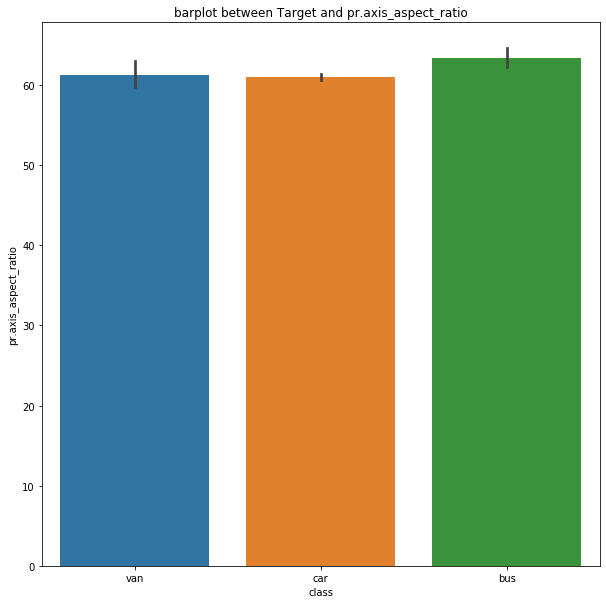

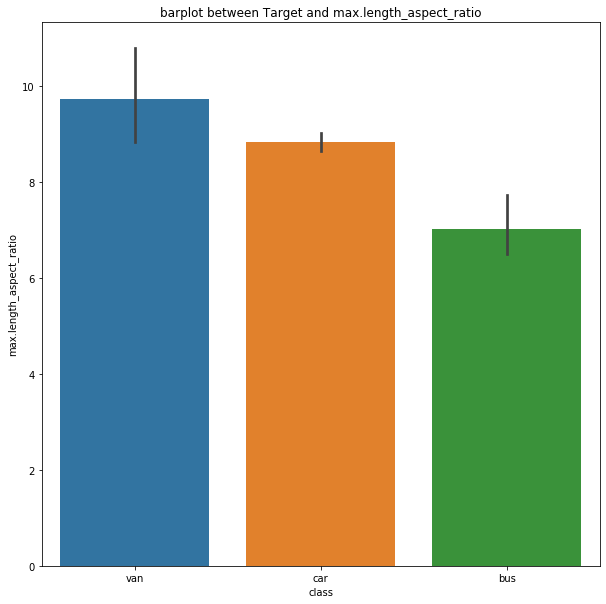

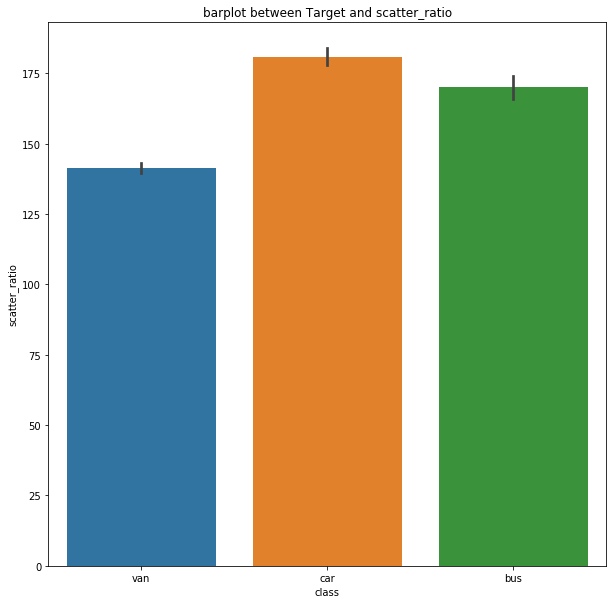

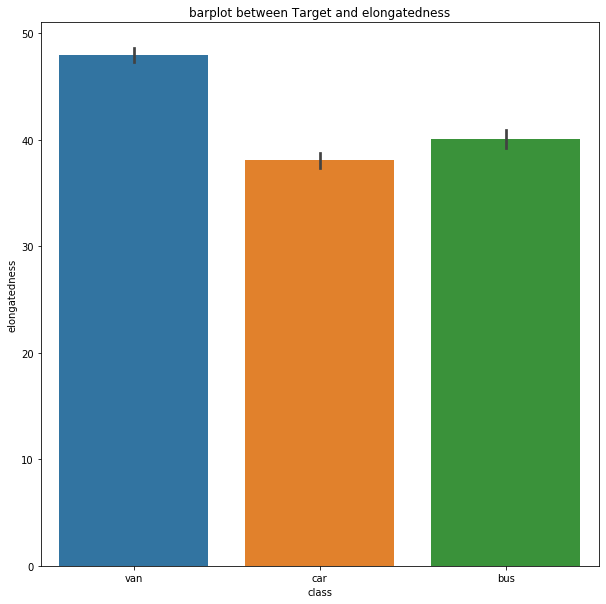

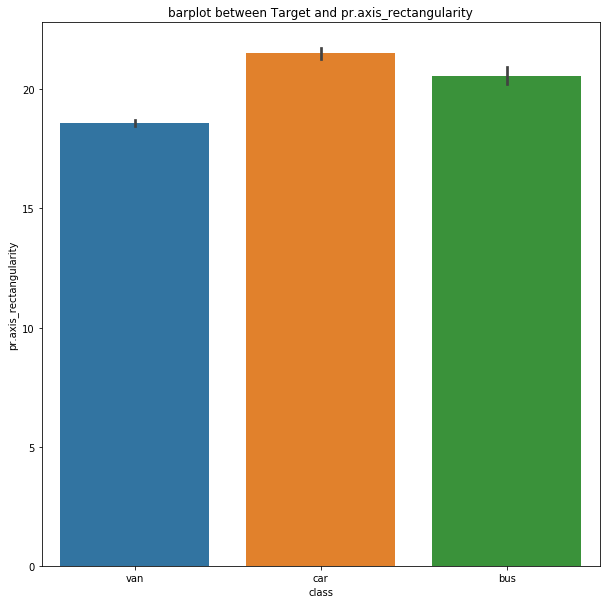

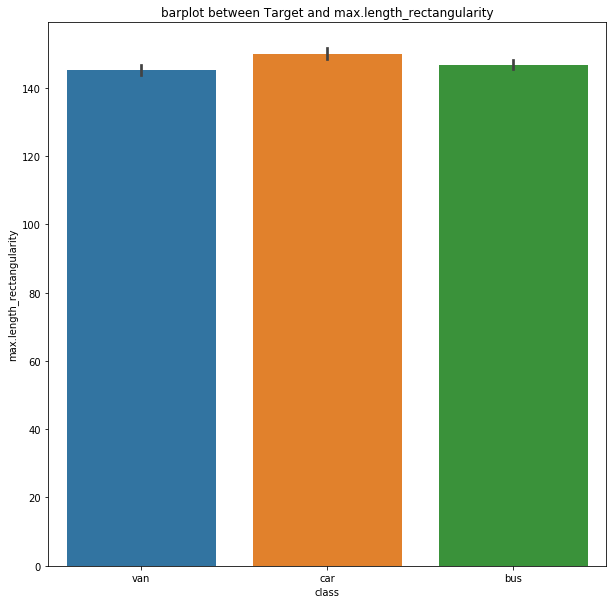

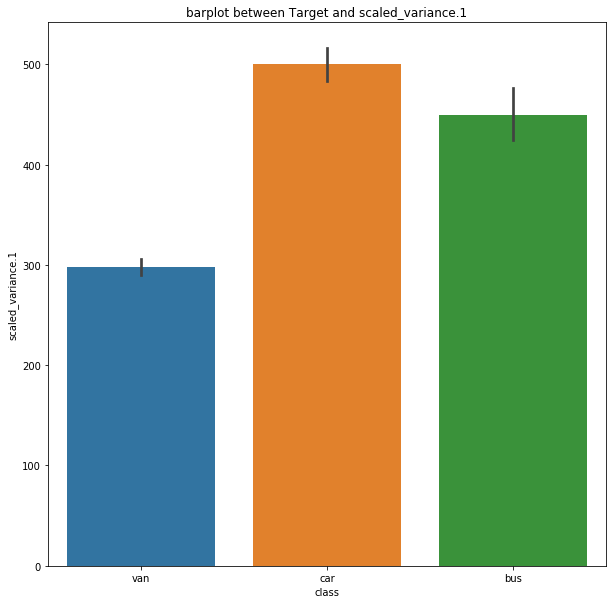

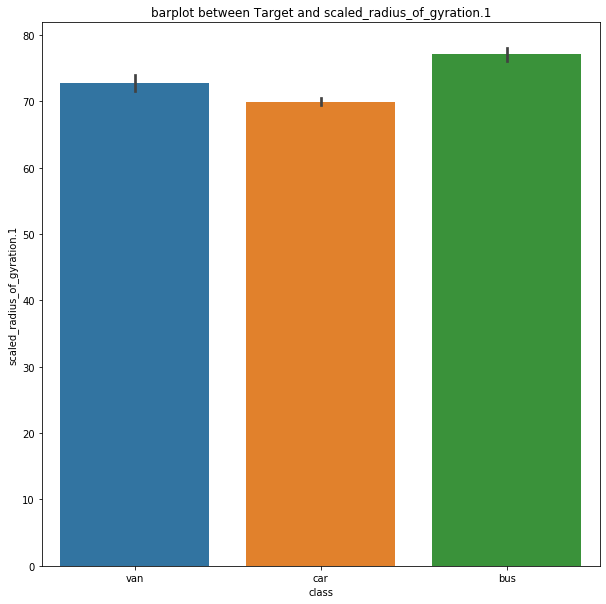

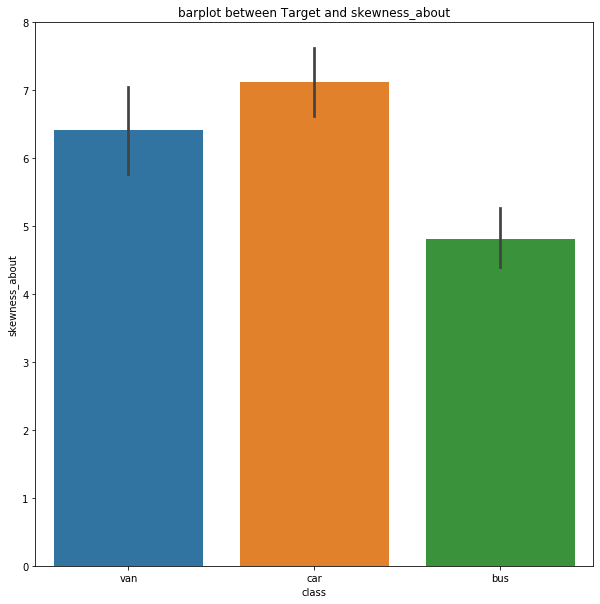

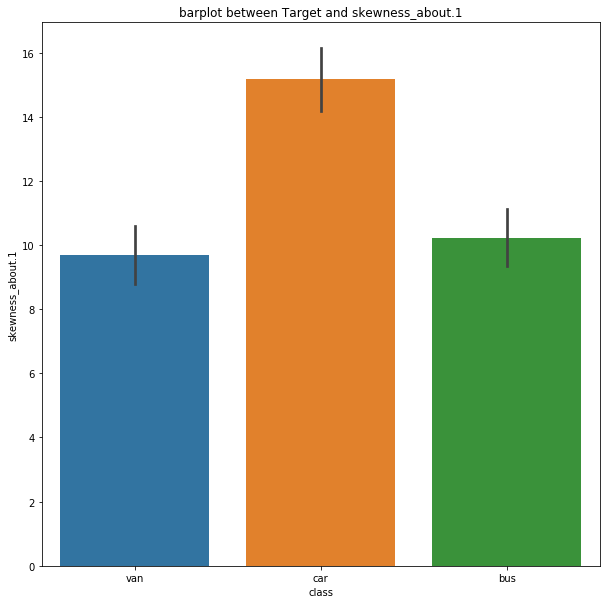

In [15]:
for num in num_cols:
    plt.figure(figsize = (10,10))
    sns.barplot(y = df[num], x = df["class"])
    plt.title("barplot between Target and {}".format(num) )
    plt.xlabel('class')
    plt.ylabel(num)
    plt.savefig("barplot/barplot for {} .jpg".format(num), dpi = 100, bbox_tight = True)

In [16]:
plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.savefig("pairplot/pairplot.jpg", dpi = 100, bbox_tight = True)

<Figure size 1440x1440 with 0 Axes>

In [ ]:

for num in num_cols:
    plt.figure(figsize=(10,10))
    sns.boxplot(df[num])
    plt.xlabel(num.capitalize())
    
    plt.title("boxplot for:" +num)
    plt.savefig("Boxplot/boxplot For {}.jpg".format(num.capitalize()), dpi =100, bbox_tight = True)
    plt.xticks(rotation = 45)

Now we see the distribution of target class

In [59]:
df['class'].value_counts()/df['class'].count()*100

1    50.709220
0    25.768322
2    23.522459
Name: class, dtype: float64

In [60]:
sns.countplot(df['class'], palette = 'rainbow')
plt.savefig("countplot/countplot for class.jpg", bbox_tight = True, dpi = 100)

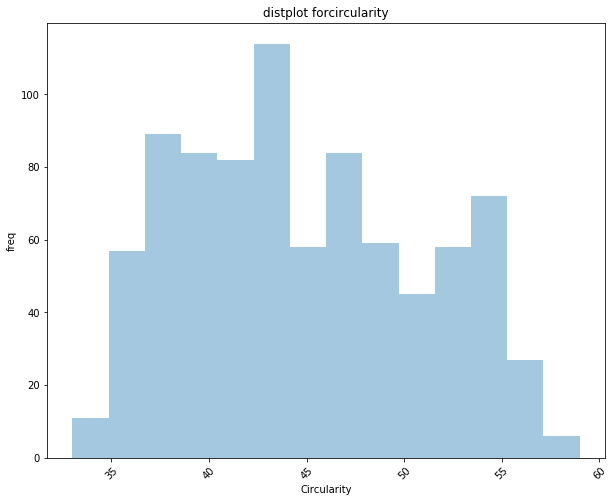

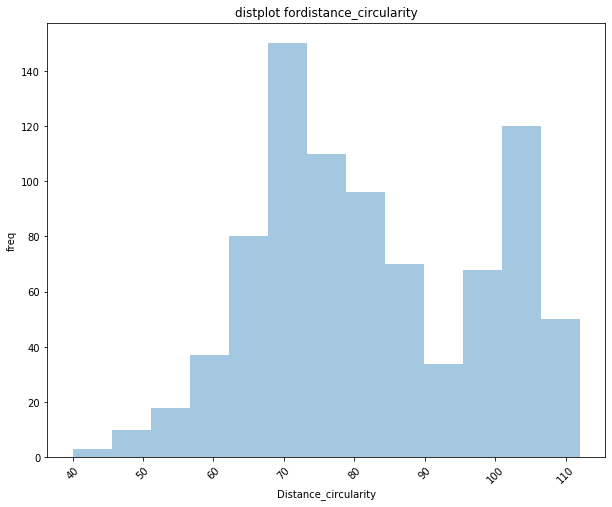

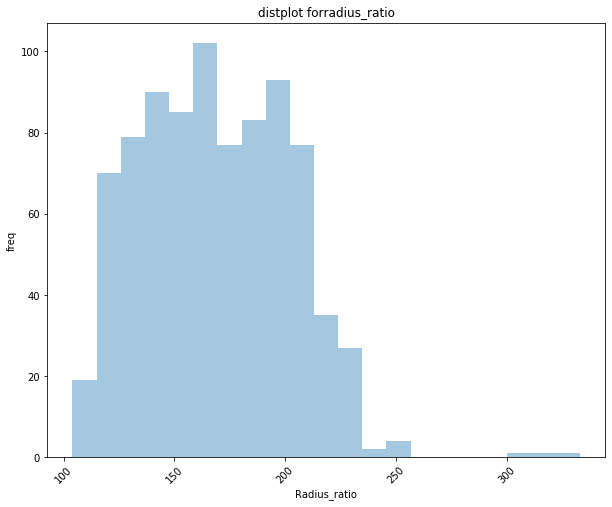

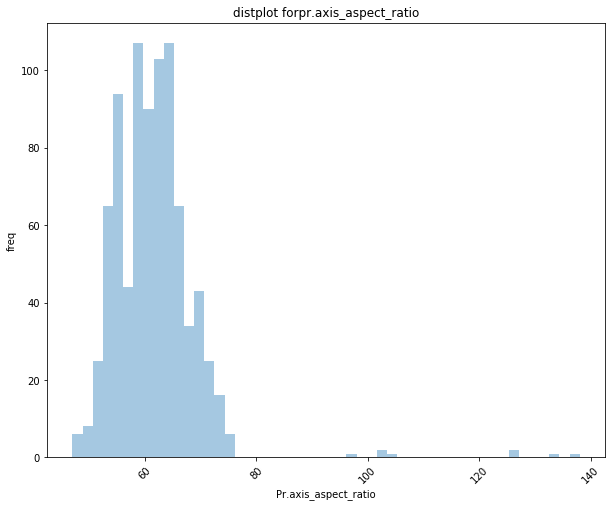

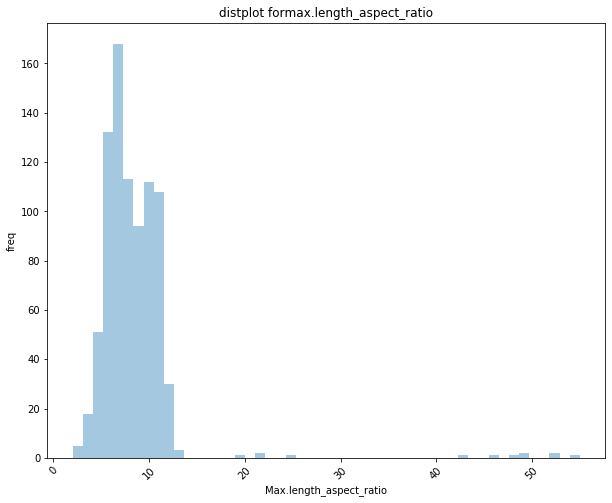

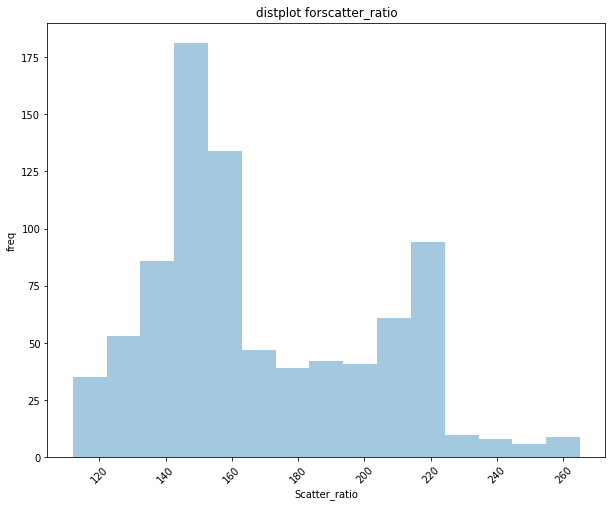

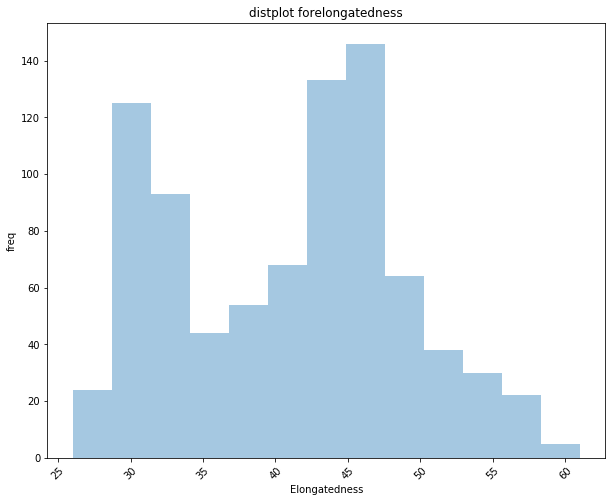

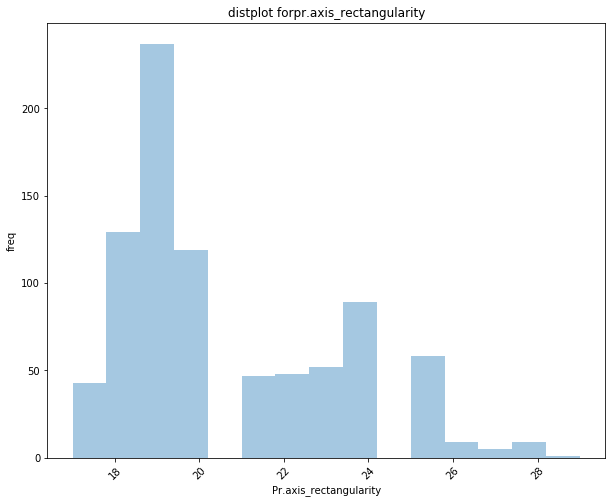

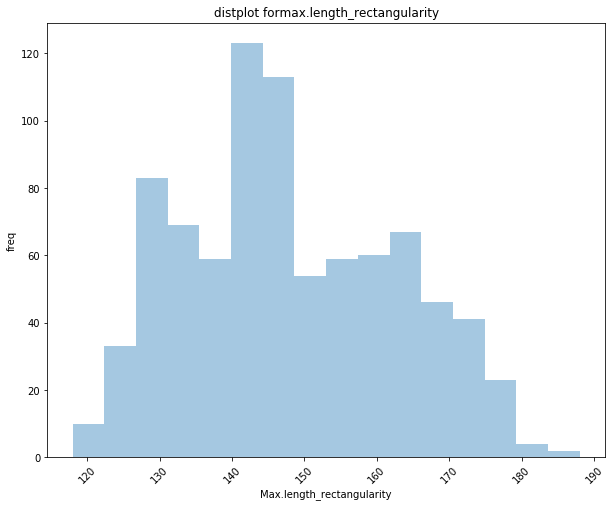

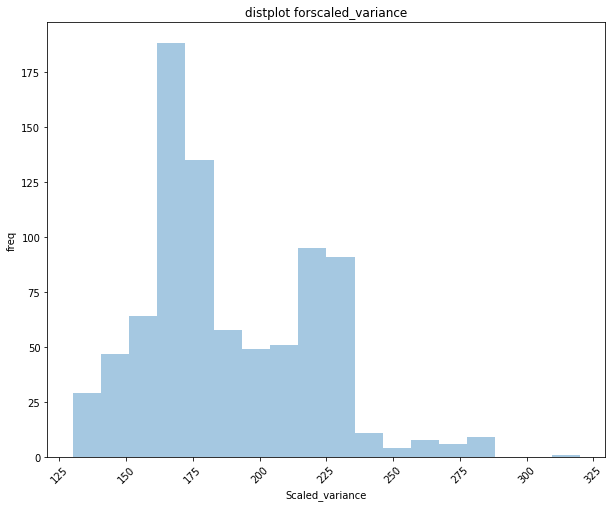

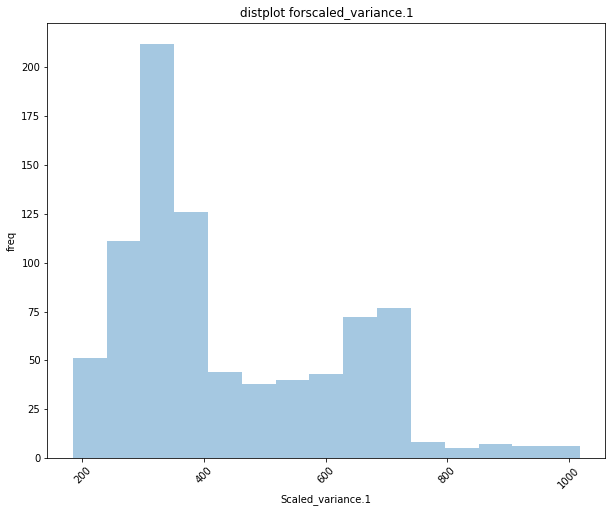

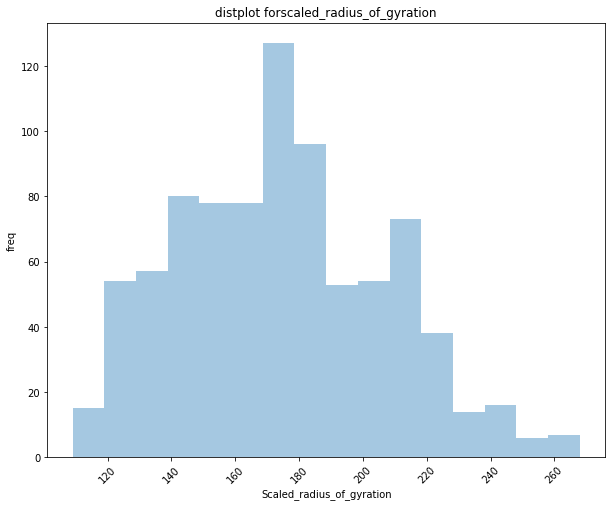

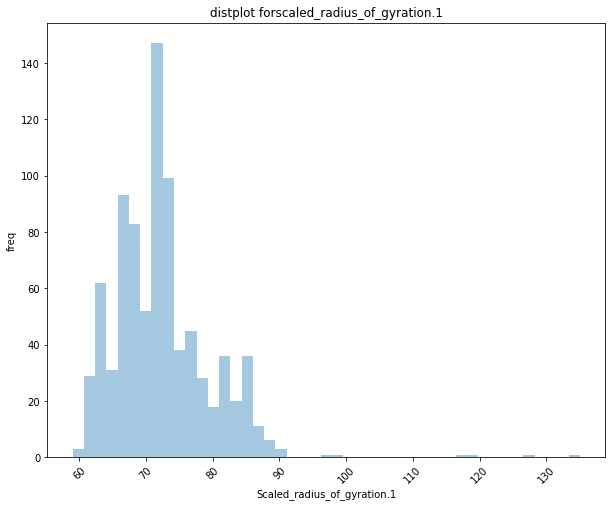

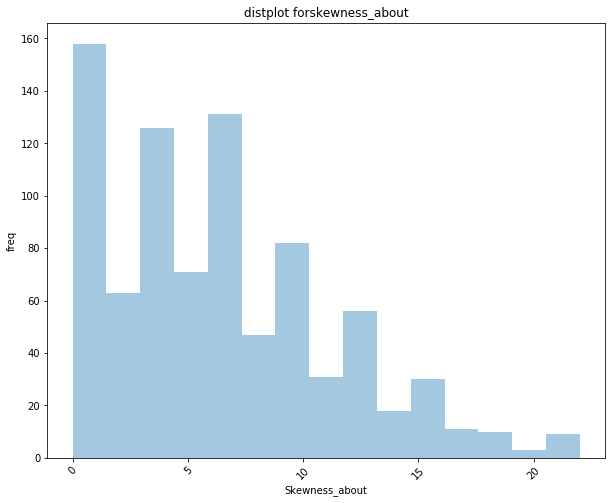

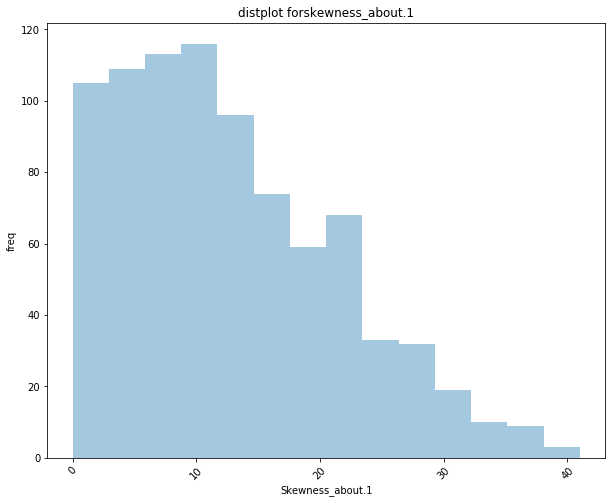

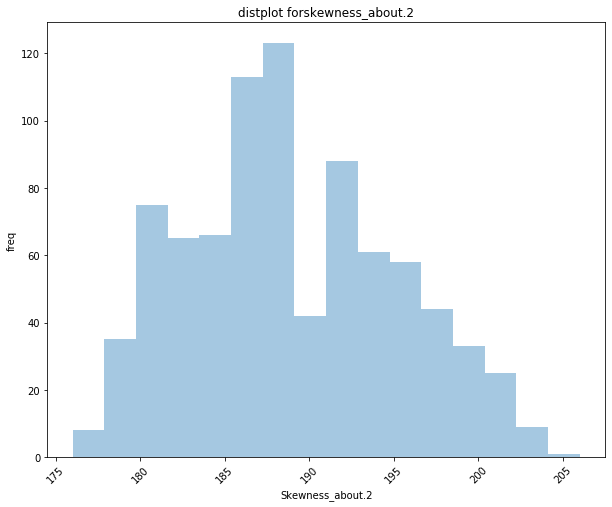

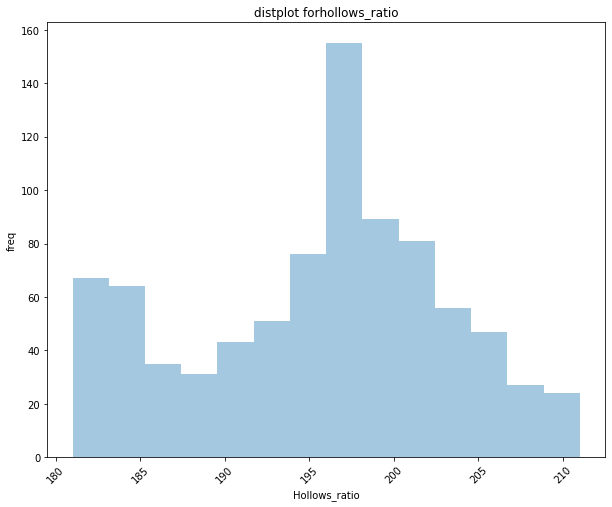

In [61]:
for cols in num_cols:
    plt.figure(figsize = (10,8))
    sns.distplot(df[cols], kde = False)
    plt.xlabel(cols.capitalize())
    plt.ylabel("freq")
    plt.title("distplot for" +cols)
    plt.savefig("Distplot/distplot For {}.jpg".format(cols.capitalize()), dpi =100, bbox_tight = True)
    plt.xticks(rotation = 45)

In [62]:
num_cols

['compactness',
 'circularity',
 'distance_circularity',
 'radius_ratio',
 'pr.axis_aspect_ratio',
 'max.length_aspect_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration',
 'scaled_radius_of_gyration.1',
 'skewness_about',
 'skewness_about.1',
 'skewness_about.2',
 'hollows_ratio']

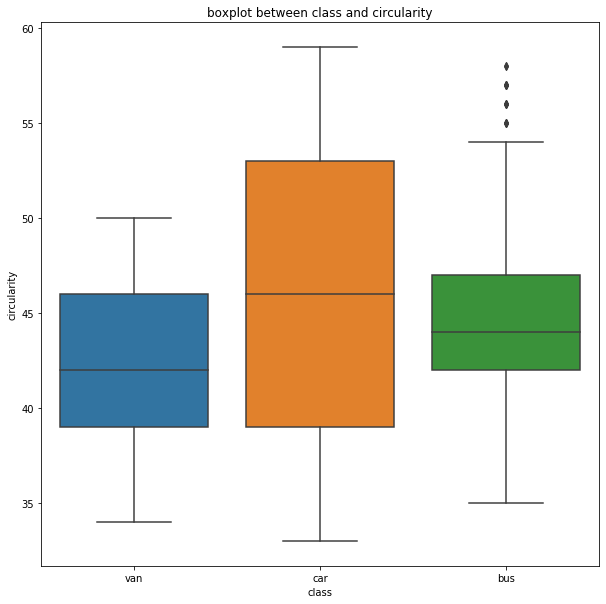

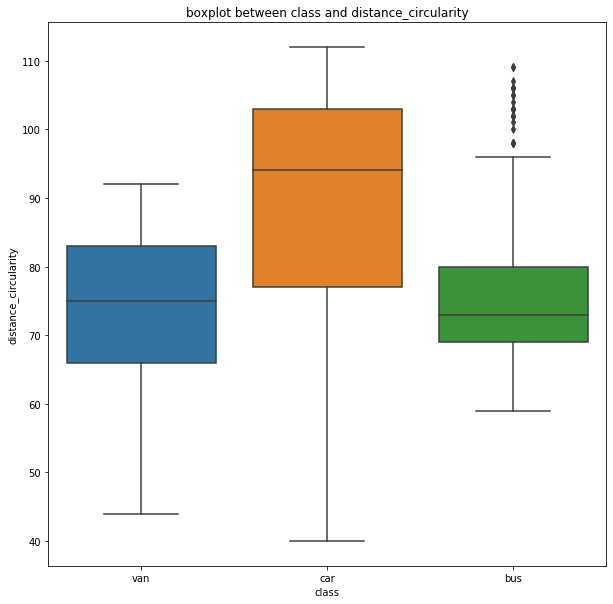

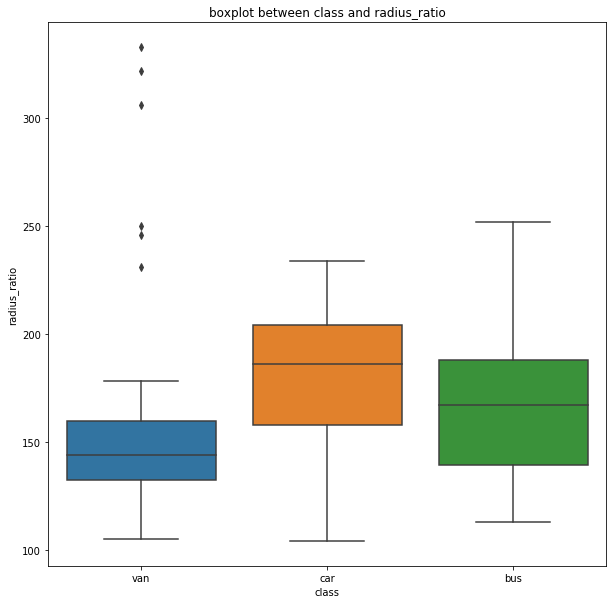

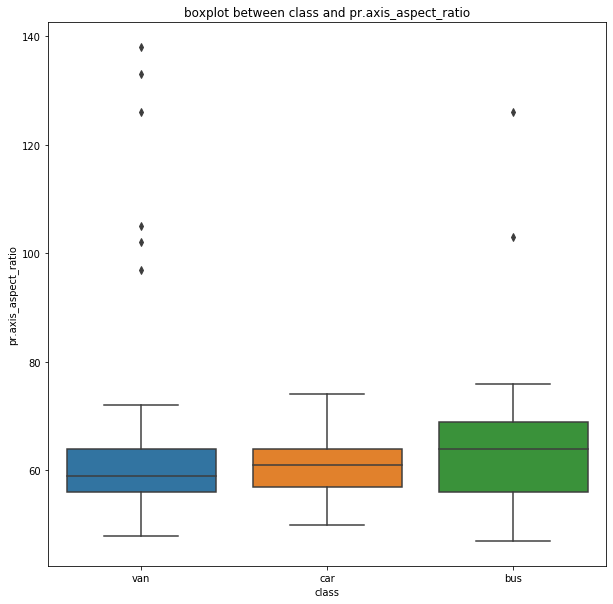

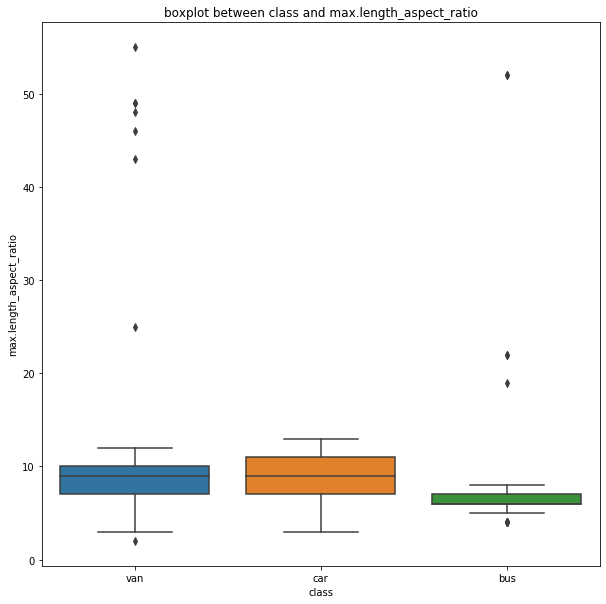

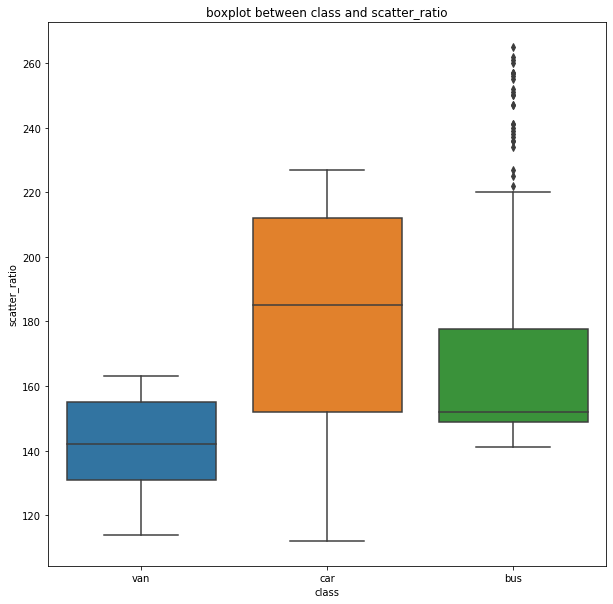

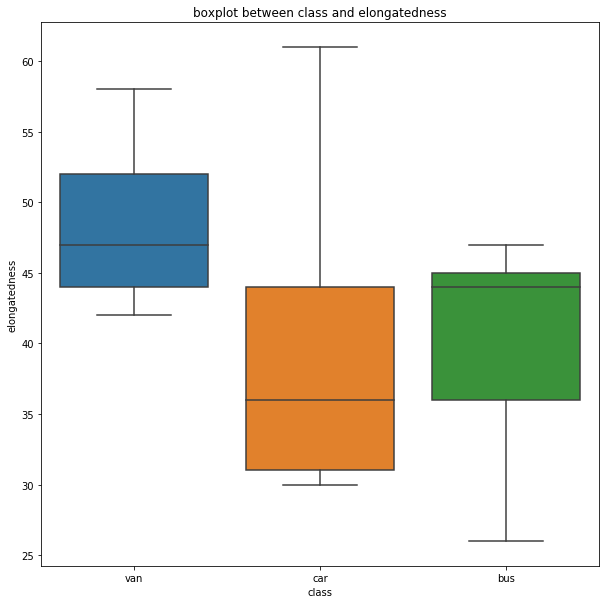

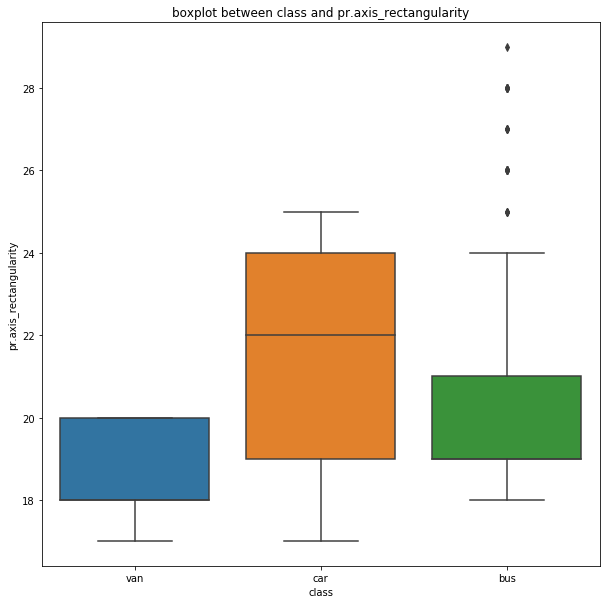

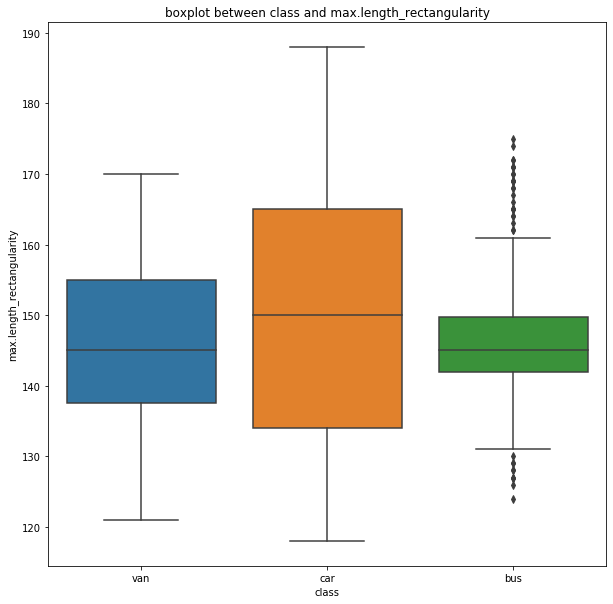

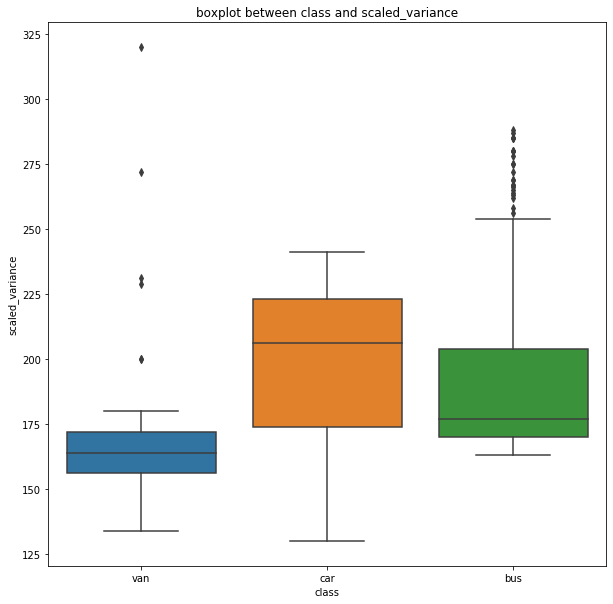

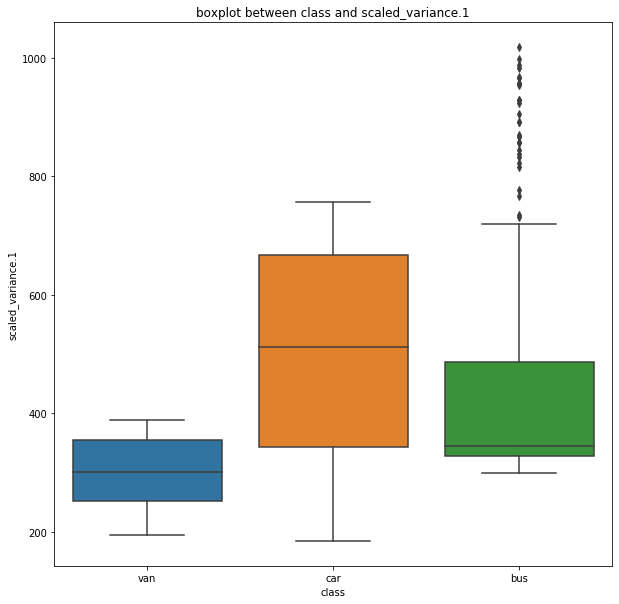

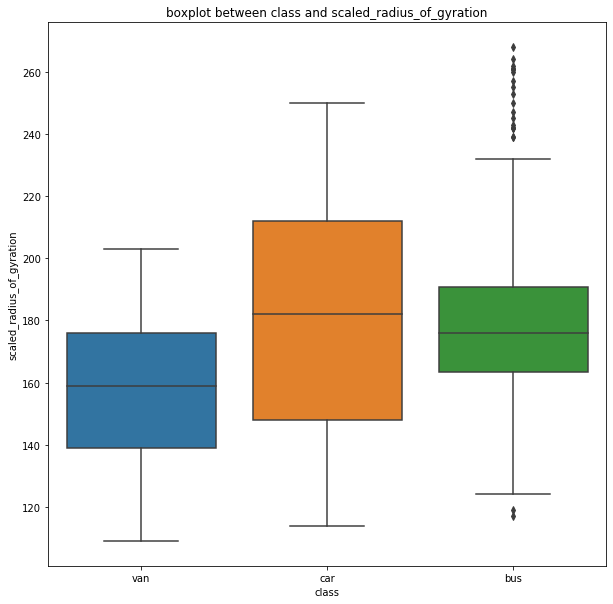

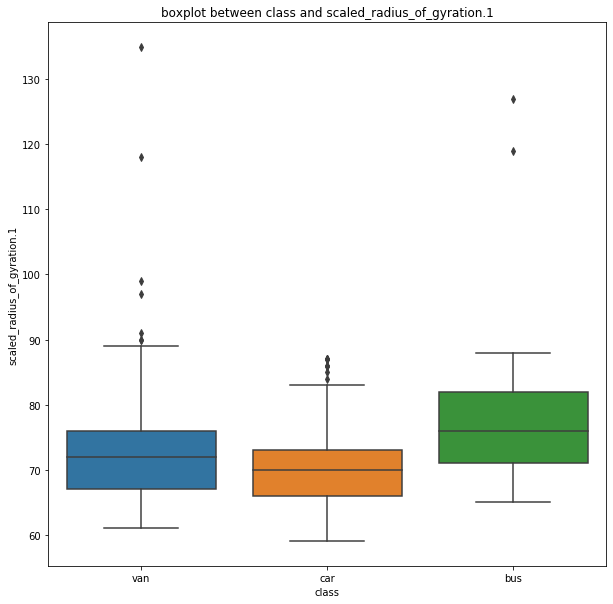

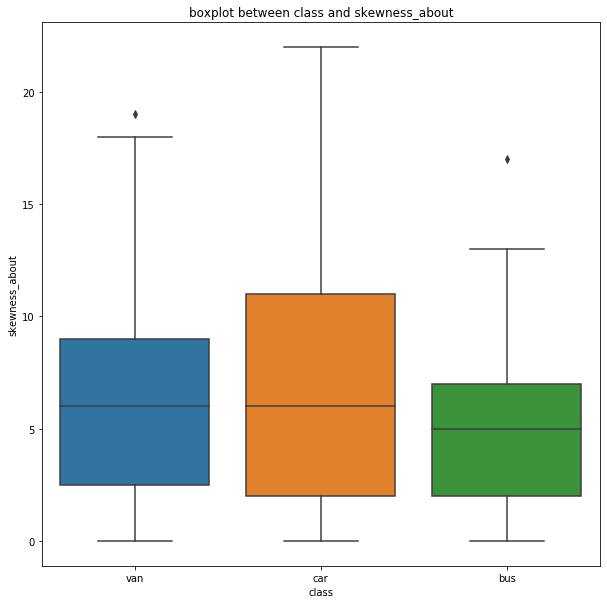

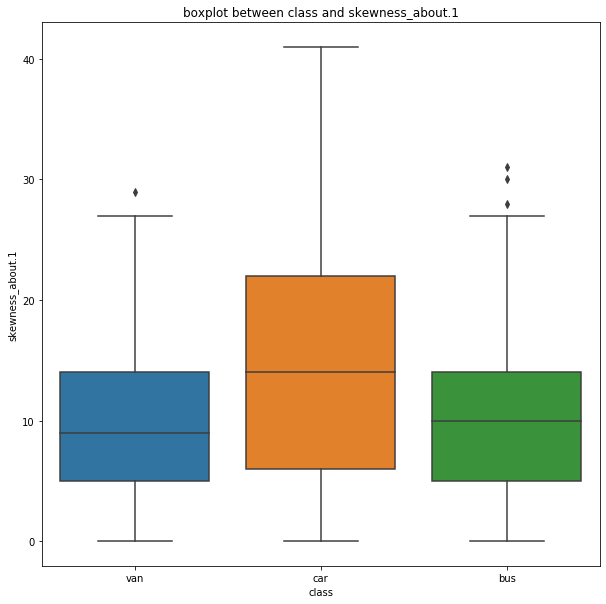

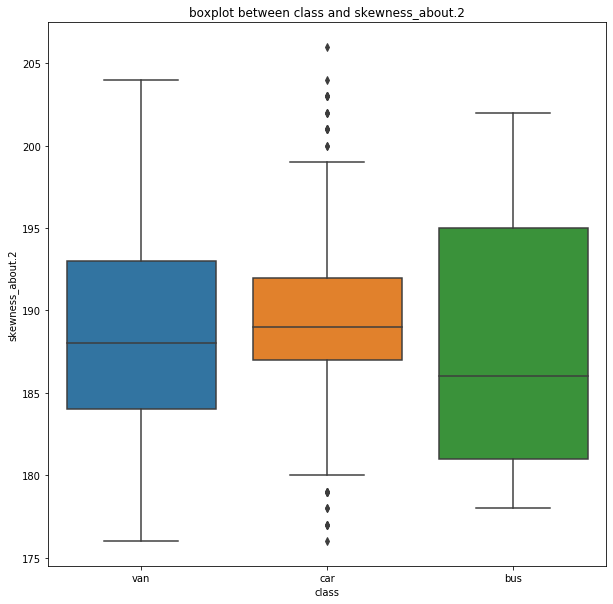

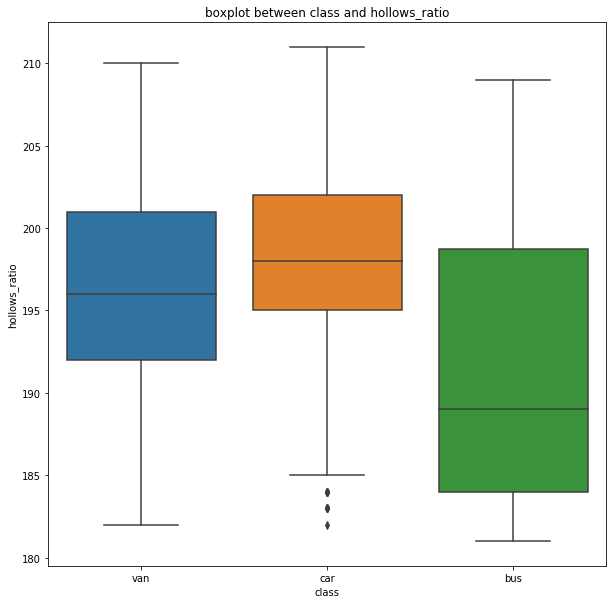

In [73]:
for num in num_cols:
    plt.figure(figsize = (10,10))
    sns.boxplot(y = df[num], x = df['class'])
    plt.title("boxplot between class and {}".format(num) )
    plt.ylabel(num)
    plt.xlabel('class')
    plt.savefig("boxplot_2/boxplot for {} .jpg".format(num), dpi = 100, bbox_tight = True)

# One Hot Encoding

In [13]:
df['class'] = pd.Categorical(df['class'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   compactness                  846 non-null    int64   
 1   circularity                  846 non-null    float64 
 2   distance_circularity         846 non-null    float64 
 3   radius_ratio                 846 non-null    float64 
 4   pr.axis_aspect_ratio         846 non-null    float64 
 5   max.length_aspect_ratio      846 non-null    int64   
 6   scatter_ratio                846 non-null    float64 
 7   elongatedness                846 non-null    float64 
 8   pr.axis_rectangularity       846 non-null    float64 
 9   max.length_rectangularity    846 non-null    int64   
 10  scaled_variance              846 non-null    float64 
 11  scaled_variance.1            846 non-null    float64 
 12  scaled_radius_of_gyration    846 non-null    float64 
 13  scale

In [15]:
df['class'] = df['class'].cat.codes

In [16]:
df['class'].head()

0    2
1    2
2    1
3    2
4    0
Name: class, dtype: int8

In [17]:
X = df.drop('class', axis = 1) 

In [18]:
y = df['class']

# Scaling of Data: 

In [19]:
from scipy.stats import zscore

In [20]:
X_new = X.apply(zscore)
X_new.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

# 3) Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn) (5 marks)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# 4) Train a Support vector machine using the train set and get the accuracy on the test set (10 marks

In [23]:
from sklearn.svm import SVC

In [24]:
clf = SVC()

In [25]:
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import *

In [27]:
print(accuracy_score(y_test, clf.predict(X_test)))

0.6535433070866141


# 5) Perform K-fold cross validation and get the cross validation score of the model (10 marks)

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold`

In [29]:
kfold = StratifiedKFold(n_splits = 10, random_state = 1)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [30]:
lin_score = cross_val_score(clf, X, y, cv = kfold)

In [31]:
lin_score

array([0.65882353, 0.67058824, 0.69411765, 0.64705882, 0.65882353,
       0.76470588, 0.72619048, 0.64285714, 0.69047619, 0.70238095])

In [32]:
lin_score.mean()

0.6856022408963586

# 6) Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data – (10 points)

# Principal Component Analysis

In [33]:
cov_matrix = np.cov(X_new, rowvar = False)
print(cov_matrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components= 15, random_state = 1)

In [36]:
pca.fit(X_new)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=1,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
pca.explained_variance_     #This are the eigen values of the components

array([9.40460261, 3.01492206, 1.90352502, 1.17993747, 0.91726063,
       0.53999263, 0.35887012, 0.22193246, 0.1606086 , 0.09185722,
       0.06649941, 0.0466006 , 0.03579472, 0.02741207, 0.02057929])

In [74]:
pca.components_            #This are the eigen vectors of the components

array([[ 2.75283688e-01,  2.93258469e-01,  3.04609128e-01,
         2.67606877e-01,  8.05039890e-02,  9.72756855e-02,
         3.17092750e-01, -3.14133155e-01,  3.13959064e-01,
         2.82830900e-01,  3.09280359e-01,  3.13788457e-01,
         2.72047492e-01, -2.08137692e-02,  4.14555082e-02,
         5.82250207e-02,  3.02795063e-02,  7.41453913e-02],
       [-1.26953763e-01,  1.25576727e-01, -7.29516436e-02,
        -1.89634378e-01, -1.22174860e-01,  1.07482875e-02,
         4.81181371e-02,  1.27498515e-02,  5.99352482e-02,
         1.16220532e-01,  6.22806229e-02,  5.37843596e-02,
         2.09233172e-01,  4.88525148e-01, -5.50899716e-02,
        -1.24085090e-01, -5.40914775e-01, -5.40354258e-01],
       [-1.19922479e-01, -2.48205467e-02, -5.60143254e-02,
         2.75074211e-01,  6.42012966e-01,  5.91801304e-01,
        -9.76283108e-02,  5.76484384e-02, -1.09512416e-01,
        -1.70641987e-02,  5.63239801e-02, -1.08840729e-01,
        -3.14636493e-02,  2.86277015e-01, -1.15679354e

In [39]:
pca.explained_variance_ratio_

array([0.52186034, 0.16729768, 0.10562639, 0.0654746 , 0.05089869,
       0.02996413, 0.01991366, 0.01231501, 0.00891215, 0.00509715,
       0.00369004, 0.00258586, 0.00198624, 0.00152109, 0.00114194])

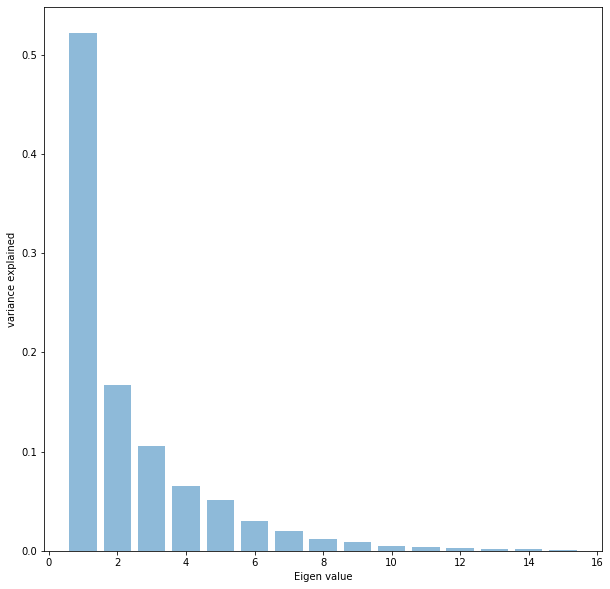

In [40]:
plt.figure(figsize = (10,10))
plt.bar(list(range(1,16)), pca.explained_variance_ratio_ , alpha = 0.5, align = 'center')
plt.xlabel('Eigen value')
plt.ylabel('variance explained')
plt.show()


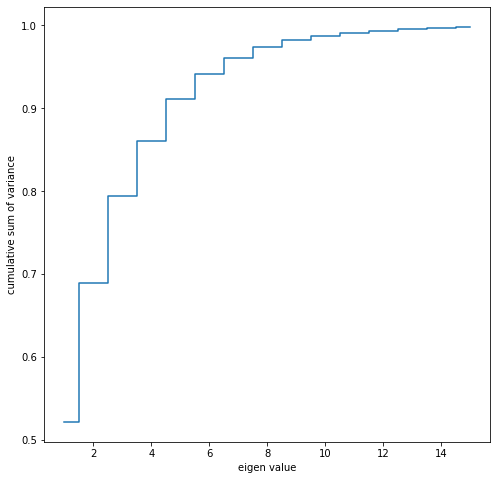

In [41]:
plt.figure(figsize= (8,8))
plt.step(list(range(1,16)), np.cumsum(pca.explained_variance_ratio_), where = 'mid')
plt.xlabel('eigen value')
plt.ylabel('cumulative sum of variance')
plt.show()

# Dimensionality Reduction

In [75]:
pca = PCA(n_components = 7, random_state = 1)
pca.fit(X_new)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=1,
    svd_solver='auto', tol=0.0, whiten=False)

In [76]:
Eigen_values = pca.explained_variance_

In [77]:
Eigen_vectors = pca.components_

In [78]:
pca.explained_variance_ratio_

array([0.52186034, 0.16729768, 0.10562639, 0.0654746 , 0.05089869,
       0.02996413, 0.01991366])

In [79]:
total_variance = np.sum(pca.explained_variance_ratio_)
total_variance

0.9610354875345347

In [80]:
Xpca = pca.transform(X_new)       #We transform the X_new variable by PCA Transformation

In [48]:
Xpca

array([[ 3.34162030e-01, -2.19026358e-01,  1.00158417e+00, ...,
         7.93007079e-02, -7.57446693e-01, -9.01124283e-01],
       [-1.59171085e+00, -4.20602982e-01, -3.69033854e-01, ...,
         6.93948582e-01, -5.17161832e-01,  3.78636988e-01],
       [ 3.76932418e+00,  1.95282752e-01,  8.78587404e-02, ...,
         7.31732265e-01,  7.05041037e-01, -3.45837595e-02],
       ...,
       [ 4.80917387e+00, -1.24931049e-03,  5.32333105e-01, ...,
        -1.34423635e+00, -2.17069763e-01,  5.73248962e-01],
       [-3.29409242e+00, -1.00827615e+00, -3.57003198e-01, ...,
         4.27680052e-02, -4.02491279e-01, -2.02405787e-01],
       [-4.76505347e+00,  3.34899728e-01, -5.68136078e-01, ...,
        -5.40510367e-02, -3.35637136e-01,  5.80978683e-02]])

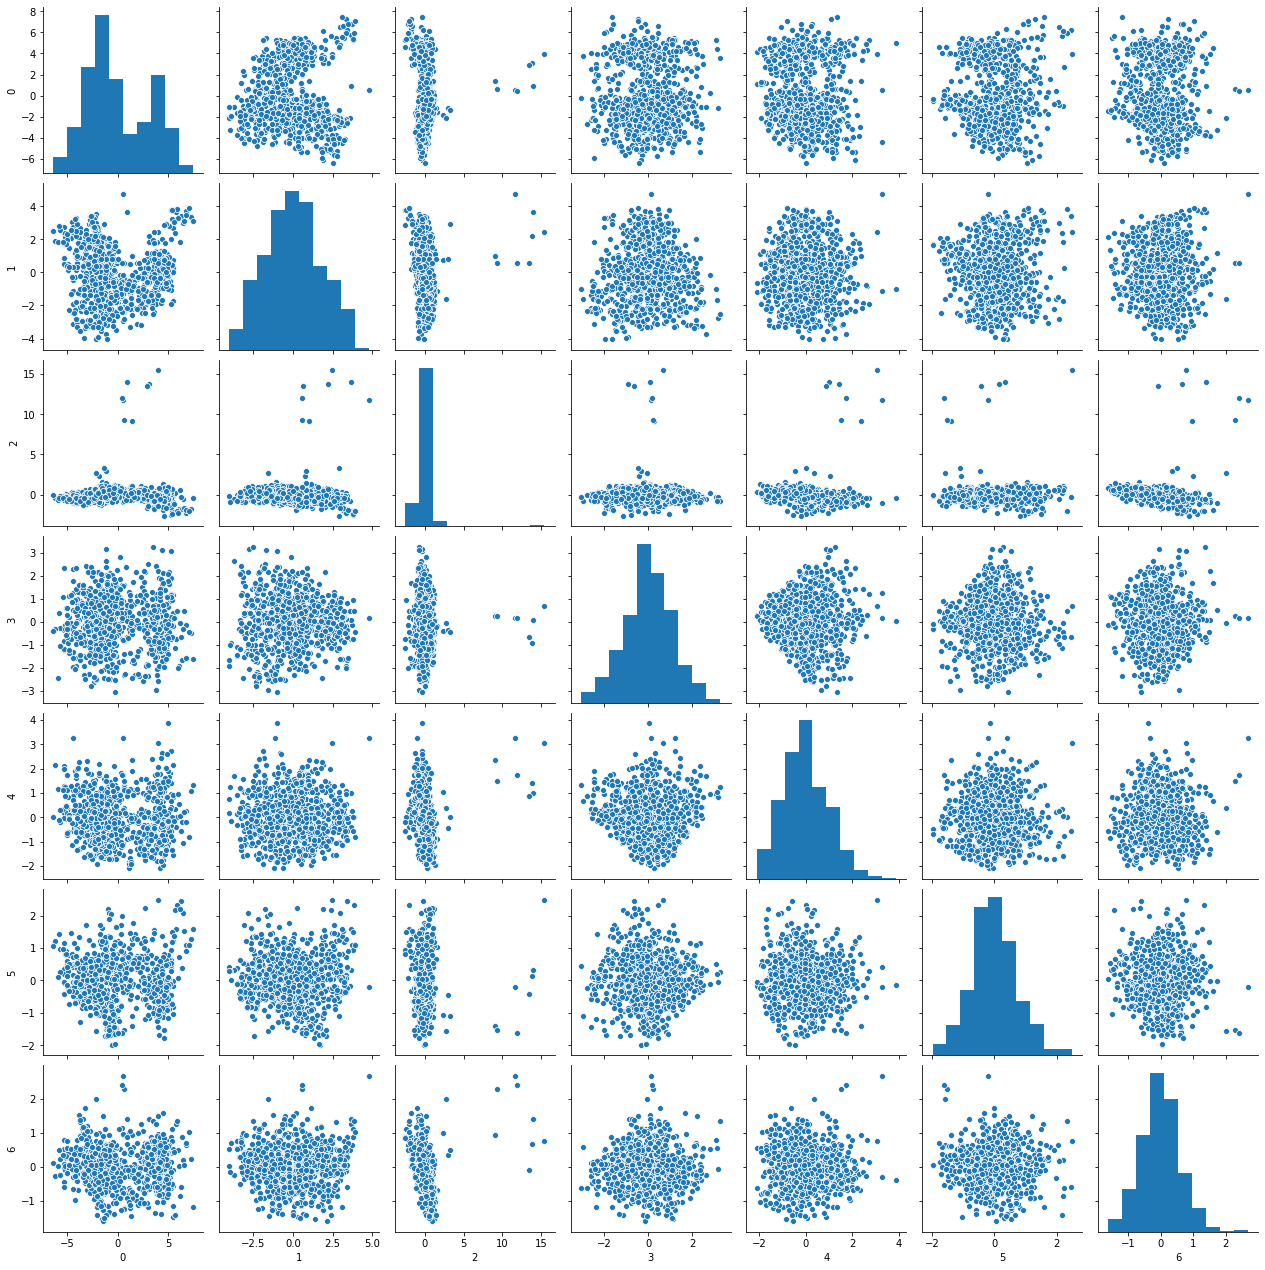

In [49]:
sns.pairplot(pd.DataFrame(Xpca))

In [50]:
df_pca = pd.DataFrame(Xpca)

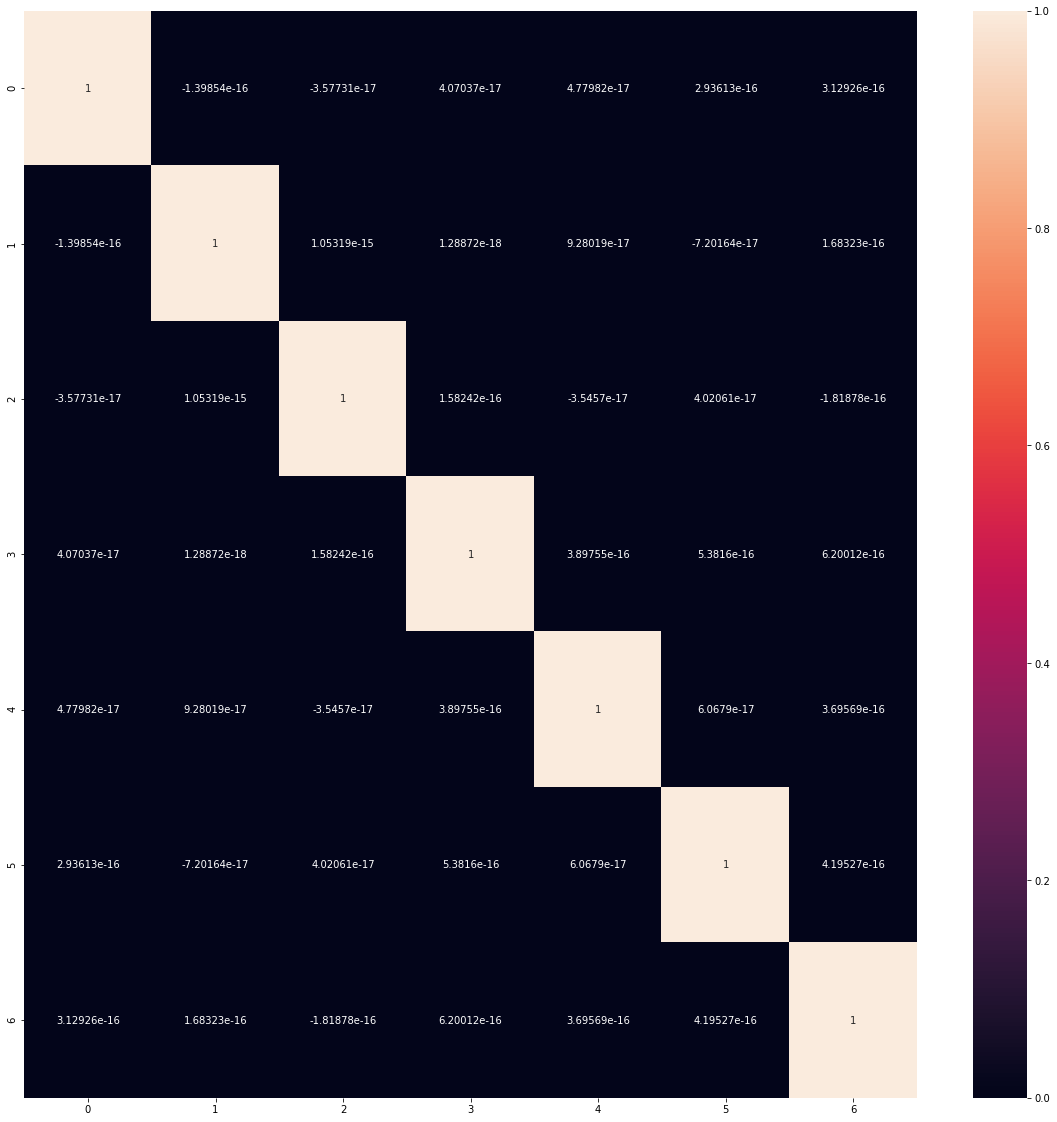

In [51]:
plt.figure(figsize=(20,20))
sns.heatmap(df_pca.corr(), annot = True, fmt = 'g' )
plt.savefig("Heatmap_3/heatmap for pca.jpg", dpi = 100, bbox_tight = True)

# 7) Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. (hint: set the same random state) (10 marks)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(Xpca, y, test_size = 0.3, random_state = 1)

In [88]:
clf_2 = SVC()

clf_2.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [83]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import *

In [84]:
print(accuracy_score(y_test, clf_2.predict(X_test)))

0.905511811023622


In [85]:
kfold_2 = StratifiedKFold(n_splits = 10, random_state = 1)
from sklearn.model_selection import cross_val_score

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [86]:
lin_score_2 = cross_val_score(clf_2, Xpca, y, cv = kfold_2)

lin_score_2

array([0.94117647, 0.94117647, 0.91764706, 0.94117647, 0.91764706,
       0.97647059, 0.86904762, 0.88095238, 0.94047619, 0.89285714])

In [87]:
lin_score_2.mean()

0.921862745098039

# 8)Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings (5 points)

# Conclusion

# SVM with principle component analysis has better performance in terms of accuracy score than that of SVM without PCA. 